In [ ]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# first neural network with keras tutorial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

# Pandas options
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# **Model Building in Tensorflow - MNIST Dataset**

**What is MNIST?**

MNIST contains 70,000 images of hand-written single digits between 0 and 9, each image is 28 x 28 pixels in greyscale with pixel-values from 0 to 255.

## **1.Load Dataset**

In [ ]:
# load tensorflow
import tensorflow as tf
mnist = tf.keras.datasets.mnist

# fix random seed for reproducibility
np.random.seed(5)
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(f"data type of X_train: {X_train_full.dtype},\nshape of X_train_full: {X_train_full.shape}")
print(f"data type of X_train: {X_test.dtype},\nshape of X_train_full: {X_test.shape}")

data type of X_train: uint8,
shape of X_train_full: (60000, 28, 28)
data type of X_train: uint8,
shape of X_train_full: (10000, 28, 28)


In [ ]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.

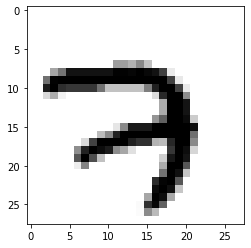

In [ ]:
# lets view the first data point of X_train
plt.imshow(X_train[0], cmap="binary")
# plt.axis('off')
plt.show()

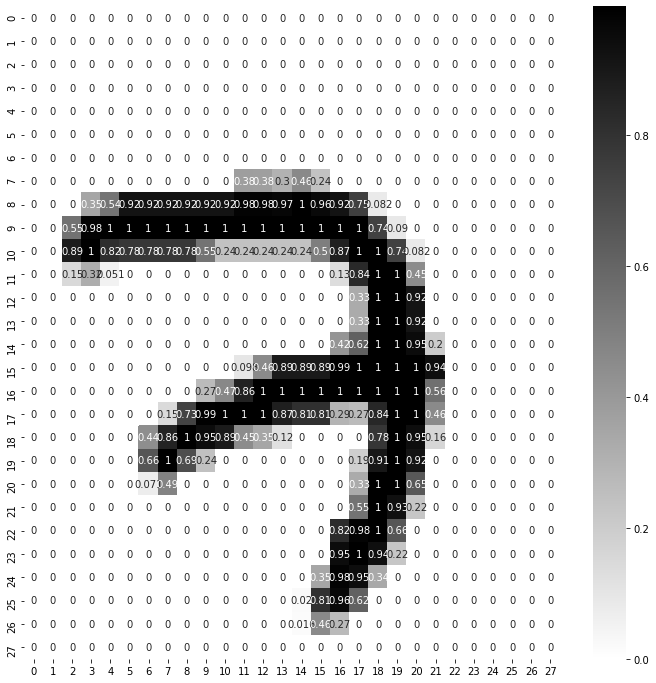

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(X_train[0], annot=True, cmap="binary");

In [ ]:
# actual value of y_train
y_train[0]

7

## **2. Define Keras Model** 
Models in Keras are defined as a sequence of layers.

1.   The model expects the input_dim= [28,28] argument since we have multidimentional array
2. he first hidden layer has 300 nodes and uses the relu activation function.
3. The second hidden layer has 100 nodes and uses the relu activation function.
4. The output layer has 10 nodes and uses the softmax activation function.



In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28])) # Input layer
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

# model = tf.keras.Sequential([
#     Flatten(input_shape=(28, 28)),
#     Dense(300, activation='relu'),
#     Dense(100, activation='relu'),
#     Dense(10,activation="softmax")
# ])

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# firsLayer * secondLayer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [ ]:
# Total parameters to be trained -
sum((235500, 30100, 1010))

266610

In [ ]:
hidden1 = model.layers[1]
hidden1.name
model.get_layer(hidden1.name) is hidden1

True

In [ ]:
hidden1.get_weights()

[array([[-0.02791498, -0.00479405, -0.03495068, ..., -0.01786048,
         -0.03829737, -0.03128471],
        [ 0.06835969,  0.01219038,  0.02664451, ...,  0.00462935,
          0.01975291,  0.01018362],
        [ 0.06955157, -0.01693607,  0.03549235, ..., -0.01673602,
          0.00844309, -0.03758449],
        ...,
        [ 0.05751121, -0.0472022 , -0.06536295, ...,  0.02412203,
         -0.05565552, -0.00075594],
        [ 0.02741384,  0.03422732,  0.01023784, ...,  0.01387661,
          0.06015313, -0.0384101 ],
        [ 0.04673543,  0.04451396, -0.04472687, ..., -0.04511027,
          0.04754451, -0.03889319]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 300) 



array([[ 7.2692961e-02, -5.9923030e-02, -4.0352058e-02, ...,
         4.5492023e-02, -5.7890963e-02,  1.9952804e-03],
       [-1.7905265e-02, -3.1016856e-02,  6.9783613e-02, ...,
        -5.9587535e-02, -5.7161368e-02,  4.3021217e-02],
       [ 5.2395940e-02, -1.4383554e-02, -3.4959588e-02, ...,
        -5.9855748e-02, -5.4124117e-02,  7.2607666e-02],
       ...,
       [ 1.2033507e-03,  5.1443279e-04,  3.8285278e-02, ...,
         3.0062348e-04, -7.1440697e-02,  5.4505035e-02],
       [ 2.0485967e-03, -5.3515427e-02,  6.5640643e-02, ...,
        -6.3600883e-02, -5.9546027e-02, -6.4634874e-02],
       [ 2.4834163e-02, -7.4356087e-02, -5.7846367e-02, ...,
        -5.4381385e-02,  1.8961728e-05, -6.0168378e-02]], dtype=float32)

In [ ]:
print("shape\n", biases.shape)
biases

shape
 (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## **3. Compile Keras Model**
Now that the model is defined, we can compile it.

In [ ]:
%%time
loss_function = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
optimizer = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
metrics = ["accuracy"]

model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=metrics)

CPU times: user 13.5 ms, sys: 0 ns, total: 13.5 ms
Wall time: 15.9 ms


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(55000, 28, 28)
(55000,)
(5000, 28, 28)
(5000,)


## **4. Fit Keras Model**

Let’s say we have 55000 training examples that we are going to use .
We can divide the dataset of 55000 examples into batches of 550 then it will take 100 iterations to complete 1 epoch

In [ ]:
%%time
# with validation dataset
valid_set = (X_valid, y_valid)

history = model.fit(X_train, y_train, 
                    epochs=10, 
                    validation_data = valid_set,
                    batch_size = 32)

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5966 - accuracy: 0.8464 - val_loss: 0.3041 - val_accuracy: 0.9176
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2840 - accuracy: 0.9194 - val_loss: 0.2332 - val_accuracy: 0.9372
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2306 - accuracy: 0.9347 - val_loss: 0.1970 - val_accuracy: 0.9440
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1972 - accuracy: 0.9443 - val_loss: 0.1700 - val_accuracy: 0.9534
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1719 - accuracy: 0.9509 - val_loss: 0.1574 - val_accuracy: 0.9562
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1525 - accuracy: 0.9565 - val_loss: 0.1420 - val_accuracy: 0.9616
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1372 - accuracy: 0.9612 - val_loss: 0.1297 - val_accuracy:

X_train.shape, 55000/32, batch size=32 by default

## **5. Save Model**

In [ ]:
import time
import os

def saveModel_path(model_dir="/content/drive/MyDrive/Industry_Session_19_June_2021/saved_models"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path

In [ ]:
unique_path = model.save(saveModel_path())
unique_path

your model will be saved at the following location
/content/drive/MyDrive/Industry_Session_19_June_2021/saved_models/Model_2021_06_17_00_25_27_.h5


In [ ]:
# loaded_model = tf.keras.models.load_model("saved_model/Model_2021_05_23_03_43_03_.h5")

In [ ]:
history.params

{'epochs': 10, 'steps': 1719, 'verbose': 1}

In [ ]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.5966,0.8464,0.3041,0.9176
1,0.2840,0.9194,0.2332,0.9372
2,0.2306,0.9347,0.1970,0.9440
3,0.1972,0.9443,0.1700,0.9534
4,0.1719,0.9509,0.1574,0.9562
5,0.1525,0.9565,0.1420,0.9616
6,0.1372,0.9612,0.1297,0.9656
7,0.1237,0.9647,0.1209,0.9682
8,0.1124,0.9687,0.1167,0.9674
9,0.1032,0.9708,0.1107,0.9692


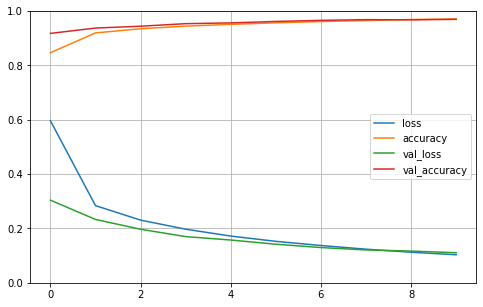

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

# Confusion Matrix
y_pred_valid = np.argmax(model.predict(X_valid), axis=-1)
print("y valid predicted shape", y_pred_valid.shape)
# true_labels = np.argmax(y_valid, axis=0)
print("y valid true shape", y_valid.shape)
print(confusion_matrix(y_pred_valid, y_valid))
print(classification_report(y_pred_valid, y_valid))

y valid predicted shape (5000,)
y valid true shape (5000,)
[[472   0   1   0   0   0   2   2   1   5]
 [  0 556   4   0   2   1   1   2   4   2]
 [  1   2 473   7   5   1   2   4   3   0]
 [  1   3   2 469   0   3   0   1   7   4]
 [  0   0   0   0 516   1   1   1   1   1]
 [  2   0   1   8   0 422   2   1   5   2]
 [  3   1   2   2   4   4 492   1   2   1]
 [  0   0   2   4   1   1   0 534   0   6]
 [  0   1   3   1   2   1   1   0 439   1]
 [  0   0   0   2   5   0   0   4   0 473]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       483
           1       0.99      0.97      0.98       572
           2       0.97      0.95      0.96       498
           3       0.95      0.96      0.95       490
           4       0.96      0.99      0.98       521
           5       0.97      0.95      0.96       443
           6       0.98      0.96      0.97       512
           7       0.97      0.97      0.97       548
           8       0.95

## **5. Predictions**

In [ ]:
X_new = X_test[:4]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([7, 2, 1, 0])

In [ ]:
y_test_new = y_test[:4]

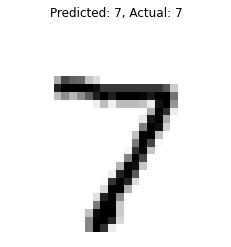

------------------------------------------------------------


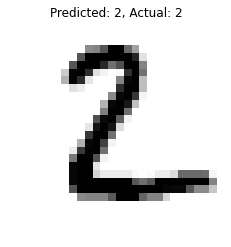

------------------------------------------------------------


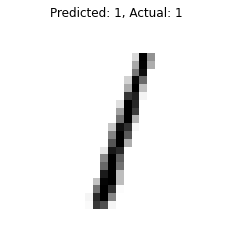

------------------------------------------------------------


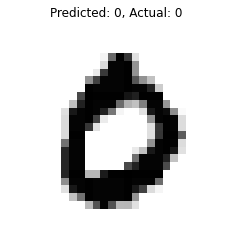

------------------------------------------------------------


In [ ]:
for data, pred, actual in zip(X_new, y_pred, y_test_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)